## Car Price Prediction

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset
#source : https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data
df = pd.read_csv('C:/Users/RIDWAN/Documents/Dataset/car_prediction_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Keterangan:
- Car_Name : merek, nama perusahaan, atau model kendaraan.
- Year : tahun pembuatan kendaraan
- Selling_Price : harga jual mobil
- Present_Price : harga mobil saat ini
- Kms_Driven : jarak tempuh setiap kendaraan
- Fuel_Type : jenis bahan bakar yang digunakan
- Seller_Type : tipe penjual (dealer atau individu)
- Transmission : jenis transmisi kendaraan (manual atau otomatis)
- Owner : menunjukkan jumlah pemiliki sebelumnya dari kendaraan

## Data Quality Check

In [3]:
#cek jumlah data
df.shape

(301, 9)

In [4]:
#cek data duplikat
df.duplicated().sum()

2

Terdapat 2 data duplikat, sehingga perlu dicek terlebih dahulu apakah duplikat pada semua feature atau salah satu saja.

In [5]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Terlihat bahwa duplikat terjadi pada beberapa feature saja, selebihnya tidak. Maka data duplikat tidak perlu dihapus.

In [6]:
#cek apakah ada missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#cek tipe data feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Semua feature sudah memiliki tipe data yang sesuai.

In [8]:
#cek isi data
for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(col, dtype)
    print(df[col].unique())

  print()

Car_Name object
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 2

## Data Insights

In [9]:
#analisis statistika sederhana
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
def percent_info(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

### Year

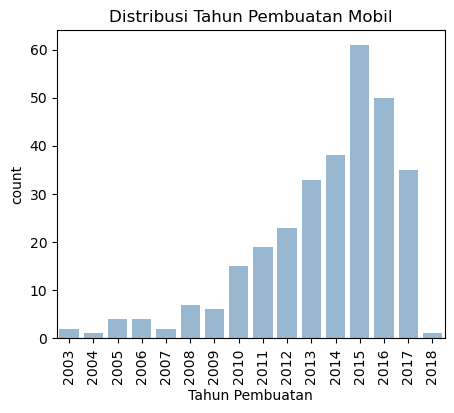

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(df, x='Year', color='#8ebad9')
plt.xticks(rotation='vertical')
plt.xlabel('Tahun Pembuatan')
plt.title('Distribusi Tahun Pembuatan Mobil')
plt.show()

- Tercatat bahwa mobil yang dijual ada mobil yang di produksi dari tahun 2003 sampai 2018.
- Mobil yang paling banyak dijual adalah mobil produksi tahun 2015.

### Selling_Price

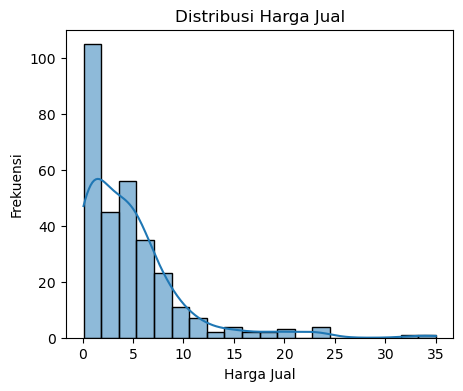

In [12]:
plt.figure(figsize=(5,4))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribusi Harga Jual')
plt.xlabel('Harga Jual')
plt.ylabel('Frekuensi')
plt.show()

Keterangan:
- Tercatat bahwa harga jual mobil berkisar dari 0.1 sampai 35.0
- Berdasarkan histogram tersebut menunjukkan bahwa sebagian besar barang memiliki harga jual yang rendah (skew positive).
- Sebagian besar harga jual memiliki harga dibawah 25.
- Semakin tinggi harga jualnya, maka semakin sedikit juga frekuensinya.

### Present_Price

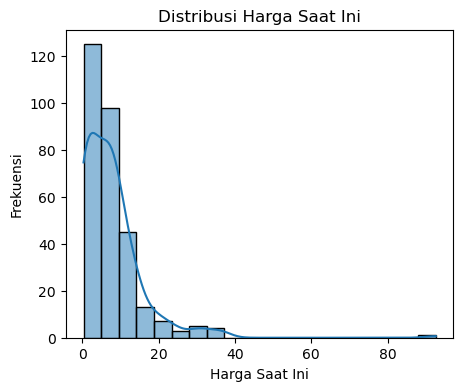

In [13]:
plt.figure(figsize=(5,4))
sns.histplot(df['Present_Price'], bins=20, kde=True)
plt.title('Distribusi Harga Saat Ini')
plt.xlabel('Harga Saat Ini')
plt.ylabel('Frekuensi')
plt.show()

Keterangan:
- Tercatat bahwa rentang harga kendaraan saat ini berkisar antara 0.32 hingga 92.6.
- Sama seperti histogram harga jual, histogram harga saat ini memiliki bentuk skew positive. Artinya, semakin kecil harga kendaraan semakin banyak jumlahnya.
- Sebagian besar harga kendaraan saat ini berada di bawah harga 40.

### Kms_Driven

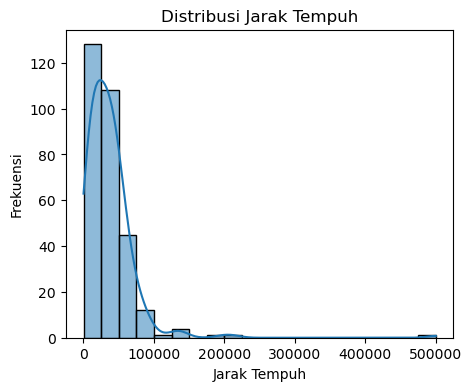

In [14]:
plt.figure(figsize=(5,4))
sns.histplot(df['Kms_Driven'], bins=20, kde=True)
plt.title('Distribusi Jarak Tempuh')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Frekuensi')
plt.show()

Keterangan:
- Tercatat bahwa jarak tempuh kendaraan yang dijual berkisar dari 500 sampai 500000 (satuan jarak).
- Histogram memiliki bentuk skew positive, yang menunjukkan bahwa beberapa distribusi data condong ke arah kiri.
- Sebagian besar jarak tempuh kendaraan yang dijual berada dibawah angka 100000 (satuan jarak).

### Fuel_Type

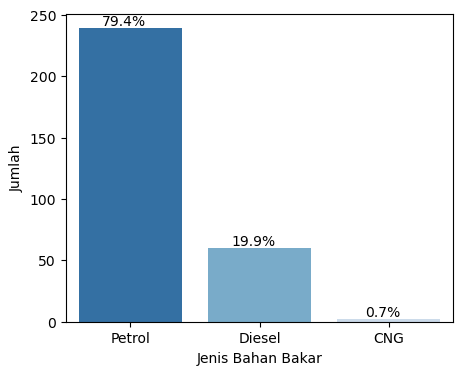

In [15]:
plt.figure(figsize=(5,4))
ax = sns.countplot(df, x='Fuel_Type', palette='Blues_r')
percent_info(ax, df)
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Jumlah')
plt.show()

Keterangan:
- Sebanyak 79,4% mobil yang dijual berbahan bakar Petrol, kemudian 19,9% berbahan bakar Diesel, dan 0,7% berbahan bakar CNG

### Seller_Type

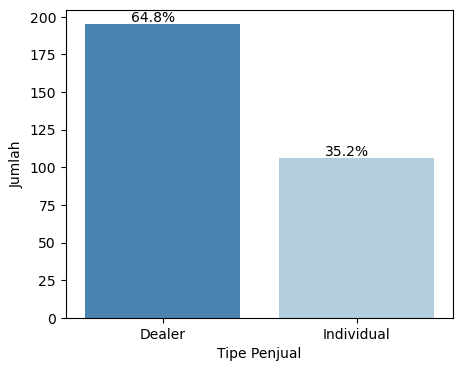

In [16]:
plt.figure(figsize=(5,4))
ax = sns.countplot(df, x='Seller_Type', palette='Blues_r')
percent_info(ax, df)
plt.xlabel('Tipe Penjual')
plt.ylabel('Jumlah')
plt.show()

Keterangan:
- Sebanyak 64,8% mobil yang dijual berasal dari Dealer, dan 35,2% berasal dari Individu.

### Transmission

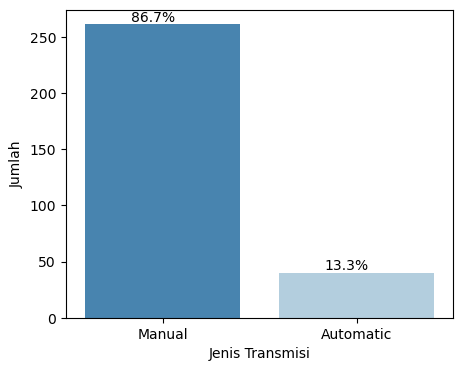

In [17]:
plt.figure(figsize=(5,4))
ax = sns.countplot(df, x='Transmission', palette='Blues_r')
percent_info(ax, df)
plt.xlabel('Jenis Transmisi')
plt.ylabel('Jumlah')
plt.show()

Keterangan:
- Sebanyak 86,7% kendaraan yang dijual memiliki transmisi manual, dan 13,3% sisanya transmisi matic.

### Owner

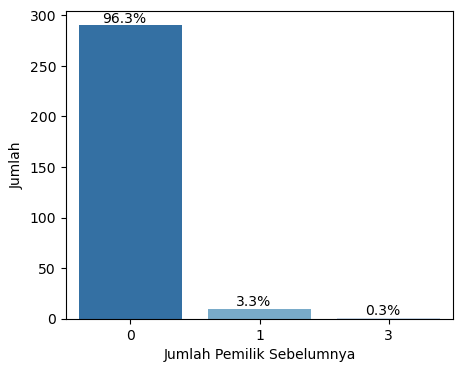

In [18]:
plt.figure(figsize=(5,4))
ax = sns.countplot(df, x='Owner', palette='Blues_r')
percent_info(ax, df)
plt.xlabel('Jumlah Pemilik Sebelumnya')
plt.ylabel('Jumlah')
plt.show()

Keterangan:
- Sebanyak 96,3% mobil yang dijual belum dimiliki oleh siapapun (baru), 3,3% mobil yang dijual adalah bekas pemakaian 1 orang, dan 0,3% sisanya bekas pemakaian 3 orang.

## Exploratory Data Analysis

### Year x Selling_Price

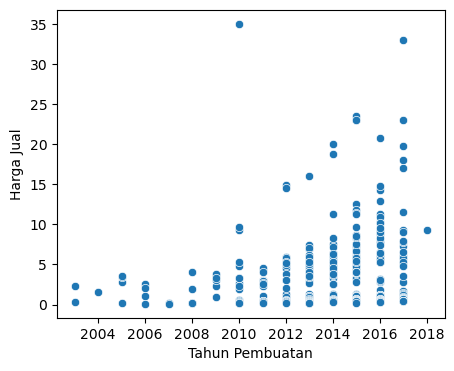

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga Jual')
plt.show()

Keterangan:
- Berdasarkan scatterplot di atas, dapat dilihat bahwa terdapat hubungan yang positif antara tahun pembuatan mobil dengan harga jualnya.
- Semakin baru mobil, maka mobil tersebut memiliki harga yang lebih tinggi.
- Terdapat mobil yang memiliki harga yang sama dengan tahun sebelumnya, dan ada juga yang memiliki harga yang berbeda di tahun yang sama (kemungkinan disebabkan faktor lain seperti merek, kondisi, kilometer, dll). 

### Selling_Price x Present_Price

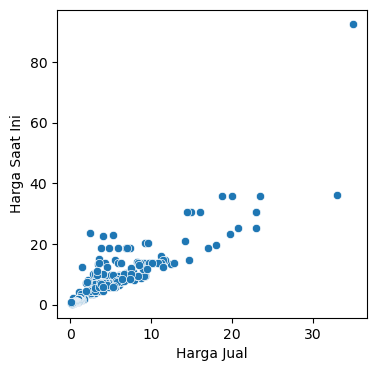

In [20]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=df)
plt.xlabel('Harga Jual')
plt.ylabel('Harga Saat Ini')
plt.show()

Keterangan:
- Terlihat bahwa sebagian besar mobil yang memiliki harga jual yang tinggi, maka semakin tinggi juga harga saat ini.
- Namun terlihat ada kasus ekstrim. Dimana harga jual mobil yang sekitar 30 lebih, bisa mencapai harga jual saat ini sebesar 80 lebih. 

### Selling_Price x Seller_Type

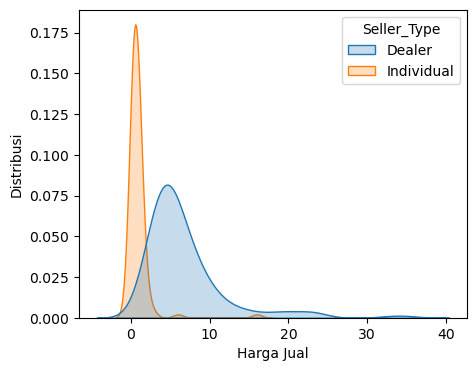

In [21]:
plt.figure(figsize=(5,4))
sns.kdeplot(x='Selling_Price', hue='Seller_Type', data=df, fill=True)
plt.xlabel('Harga Jual')
plt.ylabel('Distribusi')
plt.show()

Keterangan:
- Terlihat bahwa distribusi Dealer (biru) lebih luas dibandingkan dengan distribusi Individual (oranye). Hal tersebut menunjukkan bahwa harga jual yang ditawarkan oleh Dealer memiliki variasi harga yang lebih banyak, dengan rata-rata harga antara 0-10.
- Sedangkan Distribusi Individual (oranye) sangat tajam (mendekati nilai 0). Hal ini menunjukkan bahwa harga jual yang ditawarkan oleh individu memiliki variasi yang lebih kecil dan rata-rata harganya mendekati 0.

### Selling_Price x Transmission

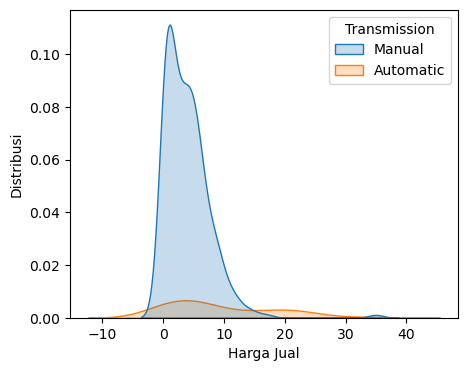

In [22]:
plt.figure(figsize=(5,4))
sns.kdeplot(x='Selling_Price', hue='Transmission', data=df, fill=True)
plt.xlabel('Harga Jual')
plt.ylabel('Distribusi')
plt.show()

Keterangan:
- Terlihat bahwa mobil dengan transmisi manual (biru) memiliki distribusi yang sangat tajam. Hal ini menunjukkan bahwa sebagian besar mobil dengan transmisi manual memiliki rentang harga 0-10.
- Sedangkan mobil dengan transmisi automatic (oranye) memiliki distribusi yang lebih merata. Artinya mobil dengan distribusi automatic (oranye) memiliki rentang harga yang lebih luas dibandingkan dengan transmisi manual. Namun, jumlahnya masih jauh berbeda dengan mobil transmisi manual.

### Kms_Driven x Selling_Price

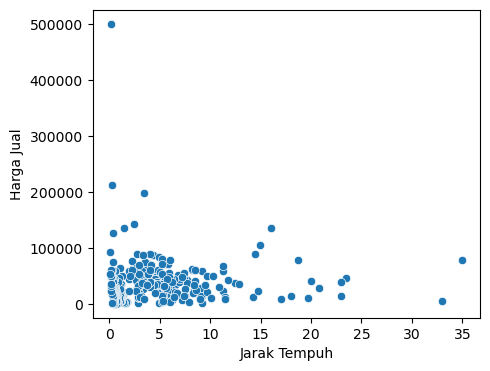

In [23]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Selling_Price', y='Kms_Driven', data=df)
plt.xlabel('Jarak Tempuh')
plt.ylabel('Harga Jual')
plt.show()

Keterangan:
- Semakin tinggi jarak tempuh suatu mobil, maka harga jualnya cenderung lebih kecil.

## Prediction Model (Machine Learning)

In [24]:
#import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
#pisahkan fitur sesuai kategori
all_feat = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Selling_Price']

categorical_feat = ['Fuel_Type', 'Seller_Type', 'Transmission']
numeric_feat = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']

In [26]:
#inisiasi variabel X dan Y
X = df[all_feat].drop('Selling_Price', axis=1)
Y = df[all_feat]['Selling_Price']

In [27]:
#data splitting
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [28]:
#preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_feat),
        ('cat', OneHotEncoder(), categorical_feat)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [29]:
#modelling
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Year', 'Present_Price',
                                                   'Kms_Driven', 'Owner']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

In [30]:
#evaluasi model dengan data validation
Y_val_pred = model.predict(X_val)

MSE_val = mean_squared_error(Y_val, Y_val_pred)
print(f'MSE: {MSE_val}')

MSE: 9.875387079460141


In [31]:
#testing
Y_test_pred = model.predict(X_test)

# Mengukur performa model pada data test
MSE_test = mean_squared_error(Y_test, Y_test_pred)
print(f'MSE: {MSE_test}')

MSE: 3.73186117059482


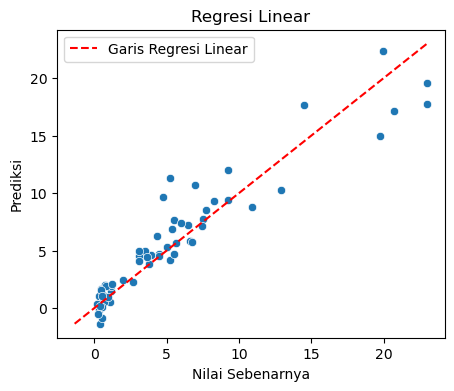

In [32]:
# Visualisasi prediksi vs nilai sebenarnya pada data test
plt.figure(figsize=(5,4))
sns.scatterplot(x=Y_test, y=Y_test_pred)
plt.title('Regresi Linear')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')

xmin, xmax = min(Y_test.min(), Y_test_pred.min()), max(Y_test.max(), Y_test_pred.max())
x_line = np.linspace(xmin, xmax, 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--', label='Garis Regresi Linear')

plt.legend()
plt.show()